In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data_path = "Data.csv"
df = pd.read_csv(data_path)

In [15]:
display(df.head())

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

1.

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [27]:
grouped_avg_pm25 = df.groupby('state')['PM2.5'].mean()
highest_avg_state = grouped_avg_pm25.idxmax()
highest_avg_value = grouped_avg_pm25.max()
print(f"State with highest average PM2.5 concentration: {highest_avg_state} ({highest_avg_value:.2f} µg/m³)")


State with highest average PM2.5 concentration: Delhi (104.10 µg/m³)


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [28]:






df.rename(columns={'Timestamp': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

if df['Date'].isna().any():
    print("There are some invalid date values in your data that could not be converted.")

df_2023 = df[df['Date'].dt.year == 2023]


hazardous_days = df_2023[df_2023['PM2.5'] > 300].groupby('state')['Date'].nunique()

most_hazardous_state = hazardous_days.idxmax()
most_hazardous_days = hazardous_days.max()

print(f"State with most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")




State with most hazardous PM2.5 days in 2023: Delhi (49 days)


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [29]:
if 'Date' in df.columns:
    pm25_variability = df_2023.groupby('state')['PM2.5'].std()
    highest_var_state = pm25_variability.idxmax()
    highest_var_value = pm25_variability.max()
    print(f"State with highest variability in PM2.5 in 2023: {highest_var_state} (Std Dev: {highest_var_value:.2f})")


State with highest variability in PM2.5 in 2023: Delhi (Std Dev: 82.80)


4. 
Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [30]:
if 'Date' in df.columns:
    df_covid = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2021)]
    covid_avg_pm25 = df_covid.groupby('state')['PM2.5'].mean()
    lowest_avg_state_covid = covid_avg_pm25.idxmin()
    lowest_avg_value_covid = covid_avg_pm25.min()
    print(f"State with lowest average PM2.5 levels during Covid (2020-2021): {lowest_avg_state_covid} ({lowest_avg_value_covid:.2f} µg/m³)")

State with lowest average PM2.5 levels during Covid (2020-2021): Mizoram (14.32 µg/m³)


2.

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [31]:
df_aug_2020 = df[(df['Date'].dt.year == 2020) & (df['Date'].dt.month == 8)]
highest_pm25_station = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax(), 'station']
highest_pm25_value = df_aug_2020['PM2.5'].max()
print(f"Station with highest PM2.5 in August 2020: {highest_pm25_station} ({highest_pm25_value:.2f} µg/m³)")

Station with highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [32]:
df_2018 = df[(df['Date'].dt.year == 2018) & 
             (df['station'].isin(['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']))]

seasons = {
    "Winter": [12, 1, 2],
    "Summer": [3, 4, 5],
    "Monsoon": [6, 7, 8, 9]
}

seasonal_avg = {}
for season, months in seasons.items():
    seasonal_avg[season] = df_2018[df_2018['Date'].dt.month.isin(months)]['PM2.5'].mean()

highest_pollution_season = max(seasonal_avg, key=seasonal_avg.get)
print(f"Season with highest pollution in 2018: {highest_pollution_season} ({seasonal_avg[highest_pollution_season]:.2f} µg/m³)")

Season with highest pollution in 2018: Winter (67.49 µg/m³)


3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
a. Calculate the monthly average PM2.5 for weekdays and weekends separately
b. X-axis: Months (January to December).
c. Y-axis: Average PM2.5 levels.
d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

Potential factors for seasonal pollution variation:
1. Winter inversion trapping pollutants.
2. Increased vehicular emissions in colder months.
3. Summer heat increasing photochemical reactions leading to secondary pollutants.
4. Monsoon rains helping to clean air pollutants.


C:\Users\kokar\AppData\Local\Temp\ipykernel_14512\3153904536.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Weekday'] = df_2021['Date'].dt.weekday
C:\Users\kokar\AppData\Local\Temp\ipykernel_14512\3153904536.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Category'] = np.where(df_2021['Weekday'] < 5, 'Weekday', 'Weekend')


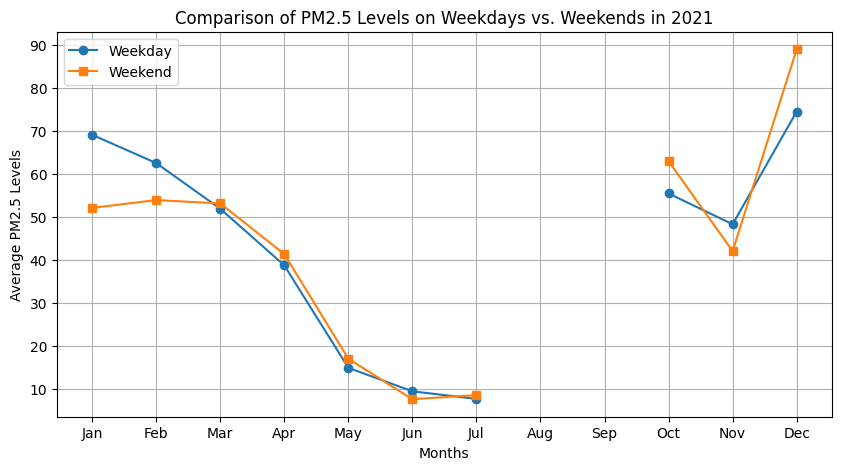

In [23]:
print("Potential factors for seasonal pollution variation:")
print("1. Winter inversion trapping pollutants.")
print("2. Increased vehicular emissions in colder months.")
print("3. Summer heat increasing photochemical reactions leading to secondary pollutants.")
print("4. Monsoon rains helping to clean air pollutants.")

df_2021 = df[(df['Date'].dt.year == 2021) & 
             (df['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]

df_2021['Weekday'] = df_2021['Date'].dt.weekday

df_2021['Category'] = np.where(df_2021['Weekday'] < 5, 'Weekday', 'Weekend')

monthly_avg = df_2021.groupby([df_2021['Date'].dt.month, 'Category'])['PM2.5'].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg['Weekday'], marker='o', label='Weekday')
plt.plot(monthly_avg.index, monthly_avg['Weekend'], marker='s', label='Weekend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Months")
plt.ylabel("Average PM2.5 Levels")
plt.title("Comparison of PM2.5 Levels on Weekdays vs. Weekends in 2021")
plt.legend()
plt.grid()
plt.show()

In [24]:

city_avg_pm25 = df.groupby('city')['PM2.5'].mean().sort_values(ascending=False)
highest_polluted_city = city_avg_pm25.idxmax()
highest_polluted_city_value = city_avg_pm25.max()
print(f"City with highest average PM2.5 levels: {highest_polluted_city} ({highest_polluted_city_value:.2f} µg/m³)")


toxic_cities = city_avg_pm25[city_avg_pm25 > 100]
print("Cities consistently exceeding safe PM2.5 levels:")
print(toxic_cities)


City with highest average PM2.5 levels: Byrnihat (137.55 µg/m³)
Cities consistently exceeding safe PM2.5 levels:
city
Byrnihat     137.546358
Begusarai    119.810165
Delhi        104.100918
Darbhanga    100.996960
Ghaziabad    100.861468
Name: PM2.5, dtype: float64
